## 제6장. 머신러닝
## 제1절. 단순 선형 회귀

In [ ]:
# 통계정 방식의 회귀분석은 정규방정식을 사용해 문제를 해결하지만, 머신러닝 모델은 경사하강법을 사용해 문제를 해결한다.

In [5]:
### 1. 정규방정식
# (1) scikit-learn의 LinearRegression  
# sklearn.linear_model.LinearRegression(*, fit_intercept = True, normalize = 'deprecated', copy_X = True, n_jobs = None, positive = False)
# fit_intercept : 데이터 타입(기본값) bool(default = True)
# - 설명 : 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정한다. False로 설정하면 절편을 사용하지 않는 모델로 계산한다. 즉, 데이터가 원점을 지나 중앙에 위치할 것으로 예상한다.
# normalize : 데이터 타입(기본값) bool(default = False)
# - 설명 : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀전에 정규화된다. False인 경우 해당 정규화를 하지 않는다. 
#   표준화를 진행하고 싶으면 normalize = False로 설정한 뒤 fit()을 호출하기전 StandarScaler()를 사용하면 된다.
# copy_X : 데이터 타입(기본값) bool(default = True)
# - 설명 : True이면 X가 복사된다. False이면 덮어쓴다.
# n_jobs : 데이터 타입(기본값) bool(default = None)
# - 설명 : 계산 작업 횟수이다.
# positive : 데이터 타입(기본값) bool(default = False)
# - 설명 : True로 하면 게수가 양수가 된다.

SyntaxError: invalid syntax (2629607093.py, line 3)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('C:/adp/data/insurance.csv')
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


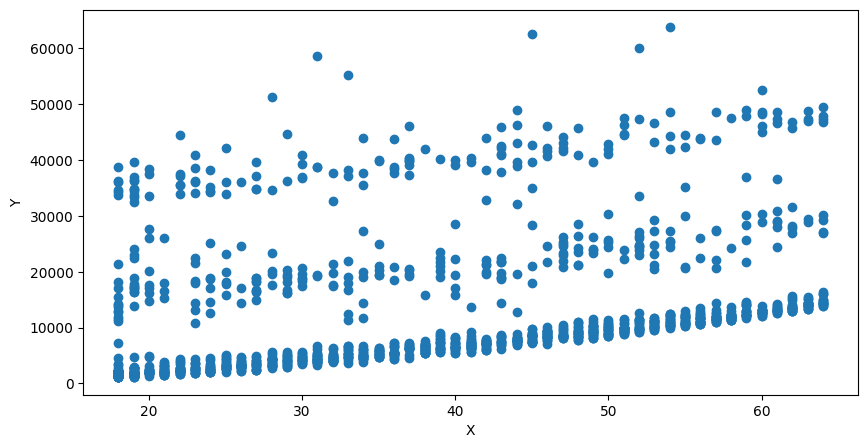

In [4]:
x=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338 ,1) 
# .reshape()으로 차원 맞추기
y=y.reshape(1338 ,1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [9]:
x

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [10]:
 print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [11]:
print(lr.score(x,y)) # 결정계수

0.08940589967885804


In [13]:
x_new=[[19],[64]]
y_hat=lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


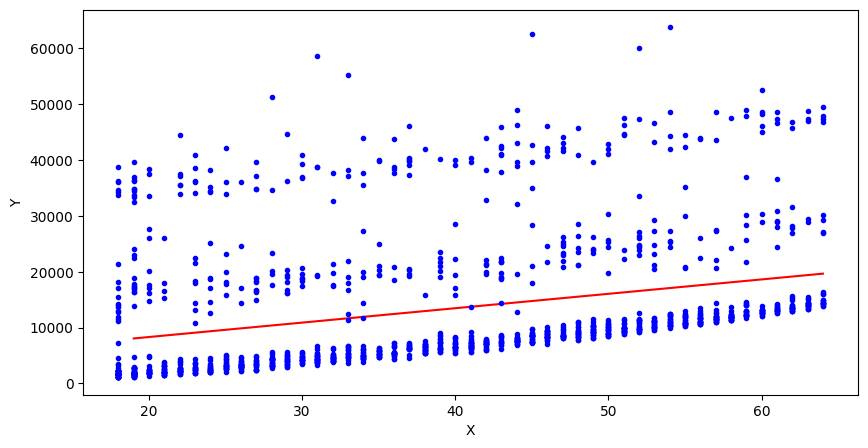

In [14]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
### 2. 정규방정식
# (1) scikit-learn의 SGDRegressor  
# 경사하강법은 함수의 값이 낮아지는 방햐응로 독립변수의 값을 바꿔가면서 최종적으로 최소 함수값을 갖도록 하는 독립변수값을 찾는 방식이다.

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data= pd.read_csv('C:/adp/data/insurance.csv')
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338 ,1) 
# .reshape()으로 차원 맞추기
y=y.reshape(1338 ,1)

sgd_reg =SGDRegressor(max_iter=1000, random_state=2022)
sgd_reg.fit(x,y.ravel())

SGDRegressor(random_state=2022)

In [25]:
 print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [5807.10093109] 계수 [256.01768147]


In [26]:
x_new=[[19],[64]]
y_hat=sgd_reg.predict(x_new)
print(y_hat)

[10671.43687908 22192.23254538]


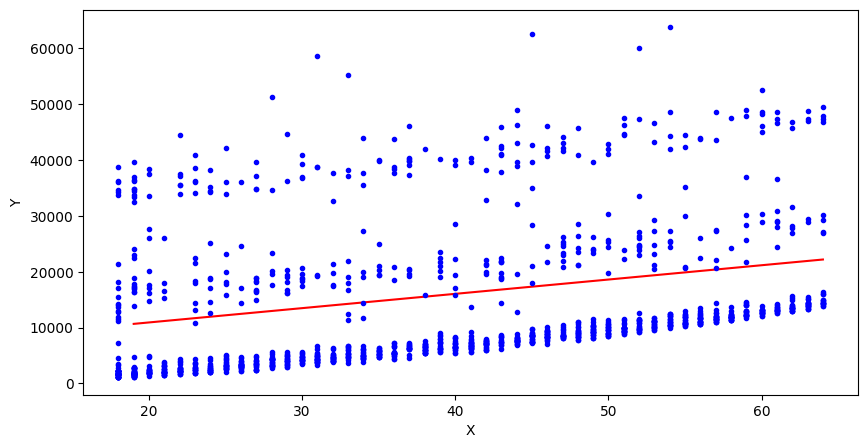

In [27]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()